In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import cv2
import os

In [2]:
DATA_DIR = "train_data"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 50

In [3]:
images = [np.load(os.path.join(DATA_DIR, f)) for f in os.listdir(DATA_DIR) if f.startswith('frame')]
labels = np.load(os.path.join(DATA_DIR, 'labels.npy'))

In [4]:
# Preprocesamiento
X = np.array(images) / 255.0
y = labels.astype(np.float32)

# Split datos
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(*IMG_SIZE, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(8, activation='sigmoid')  # 8 salidas para las teclas
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

c:\Users\julia\anaconda3\envs\ride_ia\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_val, y_val))

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 52s 675ms/step - accuracy: 0.5397 - loss: 0.3178 - val_accuracy: 0.5216 - val_loss: 0.2655
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 46s 630ms/step - accuracy: 0.5373 - loss: 0.2763 - val_accuracy: 0.5786 - val_loss: 0.2646
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 47s 644ms/step - accuracy: 0.5445 - loss: 0.2671 - val_accuracy: 0.5872 - val_loss: 0.2643
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 47s 642ms/step - accuracy: 0.5349 - loss: 0.2599 - val_accuracy: 0.4421 - val_loss: 0.2614
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 46s 636ms/step - accuracy: 0.4983 - loss: 0.2605 - val_accuracy: 0.5060 - val_loss: 0.2588
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 47s 637ms/step - accuracy: 0.5310 - loss: 0.2476 - val_accuracy: 0.5596 - val_loss: 0.2642
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 46s 634ms/step - accuracy: 0.5621 - loss: 0.2350 - val_accuracy: 0.5527 - val_loss: 0.2709
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 46s 632ms/step - accuracy: 0.5734 - loss: 0.2144 - val_accu

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step


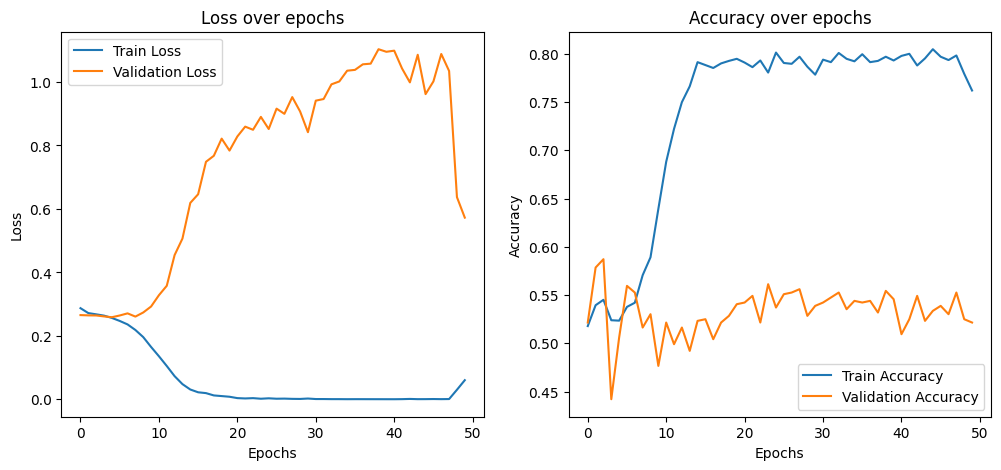

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.74      0.73      0.74       346
           5       0.40      0.31      0.35        74
           6       0.38      0.29      0.33        69
           7       0.57      0.51      0.54       260

   micro avg       0.63      0.57      0.60       749
   macro avg       0.26      0.23      0.24       749
weighted avg       0.61      0.57      0.59       749
 samples avg       0.56      0.56      0.53       749



c:\Users\julia\anaconda3\envs\ride_ia\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\julia\anaconda3\envs\ride_ia\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\julia\anaconda3\envs\ride_ia\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Evaluar el modelo en el conjunto de prueba
y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int)

# 1. Graficar la pérdida y la precisión
plt.figure(figsize=(12, 5))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over epochs')

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over epochs')

plt.show()

# # 2. Matriz de confusión
# cm = confusion_matrix(y_val, y_pred)
# plt.figure(figsize=(6, 5))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

# 3. Reporte de clasificación
print("Classification Report:\n", classification_report(y_val, y_pred))

# 4. Curva ROC y AUC
# fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
# roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(6, 5))
# plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend()
# plt.show()

# 5. Curva de Precisión-Recall
# precision, recall, _ = precision_recall_curve(y_val, y_pred_prob)
# plt.figure(figsize=(6, 5))
# plt.plot(recall, precision, color='green', lw=2)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.show()


In [8]:
model.save('game_controller_model.h5')